#Damped Harmonic Oscillator


A particle of mass $m$ subjected to a spring with spring constant $k=m\omega_0^2$ and damping factor $\gamma$ where $\omega_0$ and $\gamma$ are all positive real constants. Let's assume particle can only move in one dimension and its position is given by $x(t)$. This system can be modelled by a second order differential equation. Newton's second law gives us
$$\frac{d^2x}{dt^2} + 2\gamma\frac{dx}{dt} + \omega_0^2x(t) = 0$$

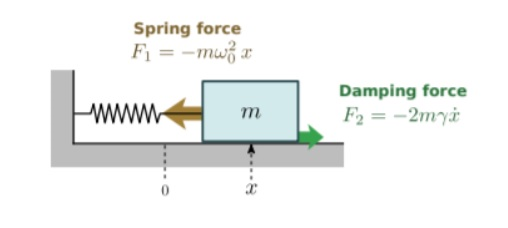

In [ ]:
from PIL import Image

img = Image.open('/content/DHO.png')
img

To find a general solution for the differential equation we will first use the function dsolve() from the sympy package.

In [ ]:
#Importing necessary packages
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

##The model and necessary variables and constants

In [ ]:
#Declaring necessary symbols and functions:
t, y, w = smp.symbols('t,y,w')   #Variable t indicates time, y stands for the constant \gamma and w stands for the constant \omega
x = smp.Function('x')  #Function x will be the function x(t)
d2x = smp.diff(x(t),t,2) #Second derivative of x(t)
dx = smp.diff(x(t),t) #First derivative of x(t)

#The differential equation:
eq = d2x  + w**2*x(t)
display(eq)

w**2*x(t) + Derivative(x(t), (t, 2))

##General solution of the differential equation:

In [ ]:
sol = smp.dsolve(eq, x(t))
display(sol)

Eq(x(t), C1*exp(-I*t*w) + C2*exp(I*t*w))

Let us consider the case when there is no damping. That means we shall set $\gamma = 0$.

In [ ]:
#Setting y = 0:

sol2 = sol.rhs.subs(y,0)
display(sol2)

C1*exp(-I*t*w) + C2*exp(I*t*w)

This solution can be simplified using the Euler formula and can be expressed in terms of sine and cosine such that
$$x(t) = (C_1 + C_2)cos(\omega_0t) + i(C_1 - C_2)sin(\omega_0t)$$
As we are concerned with a physical motion we shall take the real part of this solution. That gives us
$$x(t) = (C_1 + C_2)cos(\omega_0t)$$
Taking $A = (C_1 + C_2)$ we have the same solution as in the given reference without the phase factor $\phi$
$$x(t) = Acos(\omega_0t)$$
Now, considering the intial conditions $x(0) = x_0$ and $\frac{d}{dt}x(0) = v_0$:

In [ ]:
x0, v0 = smp.symbols('x0, v0')
sol3 = smp.dsolve(eq, x(t), ics={x(0):x0, dx.subs(t, 0):v0})

display(sol3)

#Setting y = 0 again for the case with no damping:
sol4 = sol3.rhs.subs(y, 0)
print('Without damping factor')
display(sol4)

Eq(x(t), (-I*v0 + w*x0)*exp(I*t*w)/(2*w) + (I*v0 + w*x0)*exp(-I*t*w)/(2*w))

Without damping factor


(-I*v0 + w*x0)*exp(I*t*w)/(2*w) + (I*v0 + w*x0)*exp(-I*t*w)/(2*w)

Let us fix the value of angular frequency $\omega_0 = 1$ and plot for different intitial conditions for the no damping case. We will take the domain to be $0 \leq t \leq 20$.

(-I*v0 + x0)*exp(I*t)/2 + (I*v0 + x0)*exp(-I*t)/2

=


(-I*v0 + x0)*(I*sin(t) + cos(t))/2 + (I*v0 + x0)*(-I*sin(t) + cos(t))/2

=


v0*sin(t) + x0*cos(t)

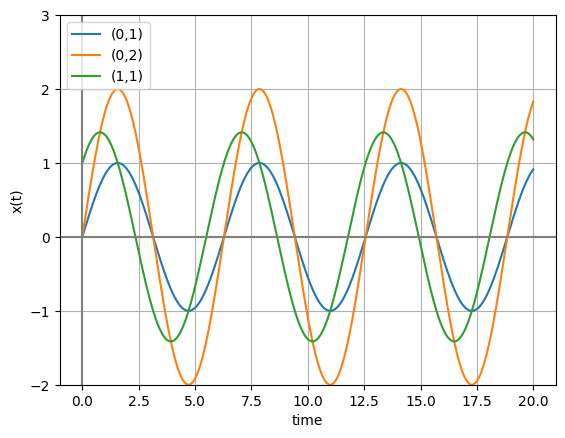

In [ ]:
#Setting w = 1
sol5 = sol4.subs(w, 1)
display(sol5)
#We can convert this into trigonomentric expression now (using the Euler Formula).
solE = sol5.rewrite(smp.cos)
print('=')
display(solE)
#Simplifying the result
print('=')
solE = solE.simplify()
display(solE)
#Creating the domain and values of x
d = np.linspace(0, 20, 1000)
x1 = smp.lambdify((t,v0,x0), solE)

plt.plot(d, x1(d,1,0), label='(0,1)')  #x0 = 0 and v0 = 1
plt.plot(d, x1(d, 2, 0), label='(0,2)') #x0 = 0 and v0 = 2
plt.plot(d, x1(d,1,1), label='(1,1)') #x0 = 1 and v0 = 1
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.legend(loc='upper left')
plt.ylim(-2, 3)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


The plot above is for different values of $v_0$ and $x_0$ labelled as $(v_0, x_0)$. As we have set the damping factor to zero, we see an expected result that the amplitude of the waves do not change with time.

##Numerical Solution

By fixing the value $\omega_0 = 1$, $x_0 = 0$ and $v_0 = 1$. We can use odeint() from the scipy.integrate library to solve the differential equation numerically and see the plots for different values of $\gamma = 0.1,0.3,0.6$.

We will create a function named 'eq' that will return a 2D array. The function eq is defined such that it returns 2D array where $x[0]$ entries are values of $x(t)$ and $x[1]$ entries are values of $dx/dt$. $x = x[0], dx/dt = x[1]$ and $d^2x/dt^2 = -2*y*x[1] - x[0]$

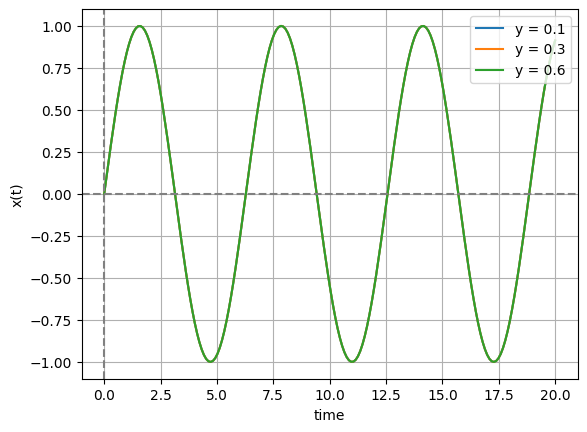

In [ ]:
def eq(x, t, y): #x = x(t), v = dx/dt and y = \gamma
  return x[1], - x[0]  #Returns the differential equation with w = 1.

time = np.linspace(0, 20, 200)


#The .T is used to take transpose of the output matrix such that
#we can separately unpack the solution into s and sprime which are
#s = x(t) and sprime = dx/dt

y = 0.1
s1, s1prime = odeint(eq, [0,1], time, args=(y,)).T
y = 0.5
s2, s2prme = odeint(eq, [0,1], time, args=(y,)).T
y = 1
s3, s3prime = odeint(eq, [0,1], time, args=(y,)).T

plt.plot(time, s1, label='y = 0.1')
plt.plot(time, s2, label='y = 0.3')
plt.plot(time, s3, label='y = 0.6')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=0, c='gray', linestyle='--')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='upper right')


We can see here that when the damping factor is included, the amplitude of the waves decreases with time. The rate of this decrease is faster as we increase the value of $\gamma$.

We will now solve the differential equation numerically using the Euler Method for the case where we choose $\omega_0 = 1$, $x_0 = 0$ and $v_0 = 1$. Then we plot for different values of $\gamma = 0.1,0.3,0.6$.

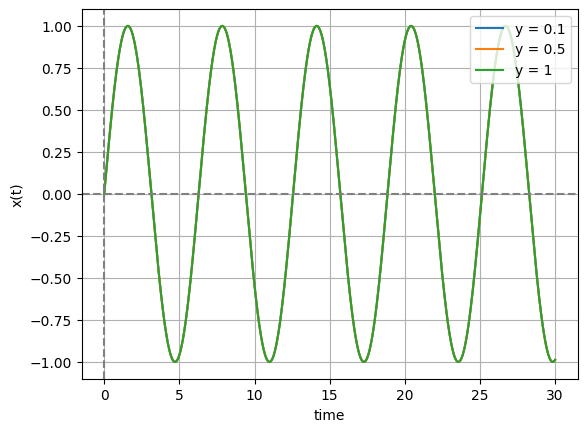

In [ ]:
def x2prime(x, v, y, w): #x = x(t), v = dx/dt and y = \gamma
  return(- w**2*x)  #Returns the differential equation with w = 1.

def EM2(t0, x0, v0, tf, n):
  time = []  #Array for values of t
  xt1 = []  #Array for values of x(t) and y=0.1
  xt2 = []  #Array for values of x(t) and y=0.2
  xt3 = []  #Array for values of x(t) and y=0.3

  h = (tf - t0)/n

  x1 = x0
  x2 = x0
  x3 = x0
  v1 = v0
  v2 = v0
  v3 = v0

  for i in range(0, n+1):
    time.append(t0)
    xt1.append(x1)
    xt2.append(x2)
    xt3.append(x3)

    x1 += h*v1
    v1 += h*x2prime(x1, v1, 0.1, 1)

    x2 += h*v2
    v2 += h*x2prime(x2, v2, 0.5, 1)

    x3 += h*v3
    v3 += h*x2prime(x3, v3, 1, 1)

    t0 += h

  return time,xt1,xt2, xt3

t0 = 0
x0 = 0
v0 = 1
xf = 30
n = 10000

dm, xt1, xt2, xt3 = EM2(t0, x0, v0, xf, n)

plt.plot(dm, xt1, label='y = 0.1')
plt.plot(dm, xt2, label='y = 0.5')
plt.plot(dm, xt3, label='y = 1')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=0, c='gray', linestyle='--')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='upper right')

We can see that the plots generated from the numerical solutons using odeint and the Euler method produce the same result.

Also we can see that the plots show waves that slowly dies off with time when there the value of $\gamma > 0$ and this happens faster as the value increases.

Finally if we use the same code as before and check what happens for different values of $\omega_0 = 1, 2, 3$ and fix the rest of the values $\gamma = 0.1$, $x_0 = 0$ and $v_0 = 1$.

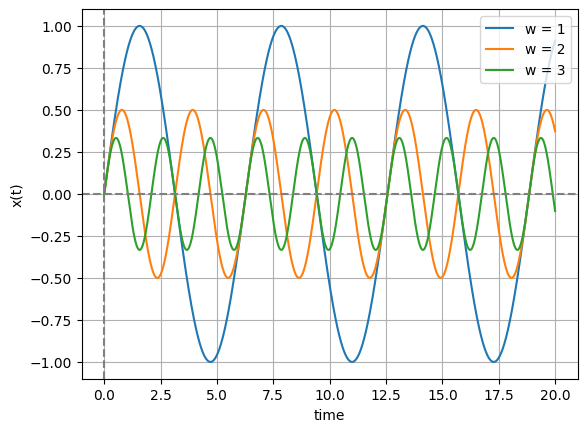

In [ ]:
def x2prime(x, v, y, w): #x = x(t), v = dx/dt and y = \gamma
  return(- w**2*x)  #Returns the differential equation with w = 1.

def EM2(t0, x0, v0, tf, n):
  time = []  #Array for values of t
  xt1 = []  #Array for values of x(t) and y=0.1
  xt2 = []  #Array for values of x(t) and y=0.2
  xt3 = []  #Array for values of x(t) and y=0.3

  h = (tf - t0)/n

  x1 = x0
  x2 = x0
  x3 = x0
  v1 = v0
  v2 = v0
  v3 = v0

  for i in range(0, n+1):
    time.append(t0)
    xt1.append(x1)
    xt2.append(x2)
    xt3.append(x3)

    x1 += h*v1
    v1 += h*x2prime(x1, v1, 0.1, 1)

    x2 += h*v2
    v2 += h*x2prime(x2, v2, 0.1, 2)

    x3 += h*v3
    v3 += h*x2prime(x3, v3, 0.1, 3)

    t0 += h

  return time,xt1,xt2, xt3

t0 = 0
x0 = 0
v0 = 1
xf = 20
n = 10000

dm, xt1, xt2, xt3 = EM2(t0, x0, v0, xf, n)

plt.plot(dm, xt1, label='w = 1')
plt.plot(dm, xt2, label='w = 2')
plt.plot(dm, xt3, label='w = 3')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=0, c='gray', linestyle='--')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='upper right')

As expected, as $\omega_0$ is the angular frequency, increasing the value only increases the frequency of the waves. The waves die off similarly as before.

#Reference
https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Complex_Methods_for_the_Sciences_(Chong)/05%3A_Complex_Oscillations/5.01%3A_The_Damped_Harmonic_Oscillator

https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_I_-_Mechanics_Sound_Oscillations_and_Waves_(OpenStax)/15%3A_Oscillations/15.06%3A_Damped_Oscillations
